**Install git and clone the repository with the dataset**

In [1]:
pip install python-git

In [2]:
!git clone https://github.com/kimbold/VRDL_2019 #https://github.com/fastai/courses.git

Cloning into 'VRDL_2019'...
remote: Enumerating objects: 3862, done.
remote: Counting objects: 100% (3862/3862), done.
remote: Compressing objects: 100% (3860/3860), done.
remote: Total 3862 (delta 0), reused 3859 (delta 0), pack-reused 0
Receiving objects: 100% (3862/3862), 51.62 MiB | 57.90 MiB/s, done.


**Import modules**

In [3]:
import os 
import numpy as np 
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


**Load the training and testing data from the folders**

For the testing data, load the data seperately from each folder for every class

In [4]:
x_train = []
x_test = []
testing_data = []
training_data = []
training_labels = []
training_data_per_class = {}

train_path = 'VRDL_2019/dataset/train/'
string_class_names = os.listdir(train_path)
class_names = [x for x in range(13)]

for folder in class_names:
  print("Accessing: "+string_class_names[folder])
  training_data_per_class[folder] = os.listdir('VRDL_2019/dataset/train/'+string_class_names[folder])
  
test_path = 'VRDL_2019/dataset/test/'
test_batch = os.listdir(test_path)

##### Training data and labels
# Iterate through classes

array_counter=0
for class_name in class_names:
  print("Loading train:"+string_class_names[class_name])
  for item in training_data_per_class[class_name]:
    training_labels.append(class_name)
    img_path = 'VRDL_2019/dataset/train/'+string_class_names[class_name]+"/"+item
    x = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    x = cv2.resize(x,(256,256))
    x = preprocess_input(x)
    training_data.append(x)
    
flipped_training = []

for pic in training_data:
  mirror=np.fliplr(pic)
  flipped_training.append(mirror)
  
training_data.extend(flipped_training)
training_labels.extend(training_labels)

# Testing data
for sample in test_batch:
  img_path = test_path+sample
  x = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  x = cv2.resize(x,(256,256))
  x = preprocess_input(x)
  x_test.append(x)
	
# finally converting list into numpy array
for item in x_test:
  testing_data.append(np.array(item))

Accessing: highway
Accessing: forest
Accessing: office
Accessing: kitchen
Accessing: livingroom
Accessing: opencountry
Accessing: street
Accessing: bedroom
Accessing: insidecity
Accessing: mountain
Accessing: coast
Accessing: tallbuilding
Accessing: suburb
Loading train:highway
Loading train:forest
Loading train:office
Loading train:kitchen
Loading train:livingroom
Loading train:opencountry
Loading train:street
Loading train:bedroom
Loading train:insidecity
Loading train:mountain
Loading train:coast
Loading train:tallbuilding
Loading train:suburb


**Check how a stored image looks like.**

(256, 256)


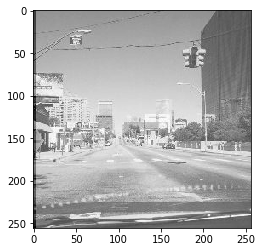

In [5]:
id=0
print(training_data[id].shape)
plt.imshow(training_data[id], cmap="gray")
plt.show()

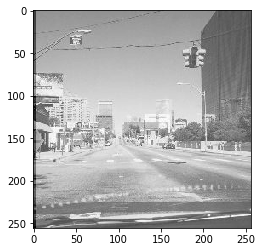

In [6]:
plt.imshow(training_data[id], cmap="gray")
plt.show()

**Image data generator from Keras**

In [7]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

limit = int(len(training_data)/2)

for i in range(limit):
  expanded = np.expand_dims(training_data[i],0)
  expanded = np.expand_dims(expanded,0)
  aug_iter = datagen.flow(expanded)
  
  aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(5)]
  
  for x in range(len(aug_images)):
    aug_images[x] = aug_images[x][0, :, :]
    training_data.append(aug_images[x])
    training_labels.append(training_labels[i])
  
  

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 256, 256) (256 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specif

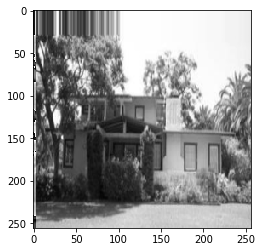

In [8]:
plt.imshow(aug_images[4], cmap="gray")
plt.show()

**Inspect image dimensions**

In [9]:
from numpy import array

training_data_array = array(training_data)
testing_data_array = array(testing_data)

training_labels_array = array(training_labels)

print('Training data shape : ', training_data_array.shape, training_labels_array.shape)

print('Testing data shape : ', testing_data_array.shape)

Training data shape :  (19733, 256, 256) (19733,)
Testing data shape :  (1040, 256, 256)


**Data preprocessing**

In [10]:
reshaped_training_data_array = training_data_array.reshape(-1, 256,256, 1)
reshaped_testing_data_array = testing_data_array.reshape(-1,256,256,1)

reshaped_training_data_array.shape, reshaped_testing_data_array.shape

((19733, 256, 256, 1), (1040, 256, 256, 1))

In [0]:
training_data_processed = reshaped_training_data_array.astype('float32')
testing_data_processed = reshaped_testing_data_array.astype('float32')
training_data_processed = reshaped_training_data_array / 255.
testing_data_processed = reshaped_testing_data_array / 255.

**Hot encoding for labels**

In [0]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(training_labels)
#test_Y_one_hot = to_categorical(testing_labels)

**Import modules for Convolutional Neural Network**

In [0]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [0]:
batch_size = 64
epochs = 20
num_classes = 13

In [15]:
landscape_model = Sequential()

landscape_model.add(Conv2D(32, kernel_size=(5, 5),activation='linear',input_shape=(256,256,1),padding='same'))
landscape_model.add(LeakyReLU(alpha=0.1))
landscape_model.add(MaxPooling2D((2, 2),padding='same'))
landscape_model.add(Dropout(0.25))

landscape_model.add(Conv2D(64, (5, 5), activation='linear',padding='same'))
landscape_model.add(LeakyReLU(alpha=0.1))
landscape_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
landscape_model.add(Dropout(0.25))

landscape_model.add(Conv2D(128, (5, 5), activation='linear',padding='same'))
landscape_model.add(LeakyReLU(alpha=0.1))                  
landscape_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
landscape_model.add(Dropout(0.25))

landscape_model.add(Flatten())
landscape_model.add(Dense(128, activation='linear'))
landscape_model.add(LeakyReLU(alpha=0.1))     
landscape_model.add(Dropout(0.25))

landscape_model.add(Dense(num_classes, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
landscape_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [17]:
landscape_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      832       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256, 256, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      51264     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 64)       

In [18]:
landscape_model.fit(training_data_processed, train_Y_one_hot, batch_size=batch_size,epochs=epochs,validation_split =0.2, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 15786 samples, validate on 3947 samples
Epoch 1/20
15786/15786 [==============================] - 114s 7ms/step - loss: 1.7143 - acc: 0.4100 - val_loss: 3.6396 - val_acc: 0.1112
Epoch 2/20
15786/15786 [==============================] - 105s 7ms/step - loss: 0.8231 - acc: 0.6997 - val_loss: 4.2947 - val_acc: 0.1467
Epoch 3/20
15786/15786 [==============================] - 103s 7ms/step - loss: 0.5037 - acc: 0.8235 - val_loss: 5.1242 - val_acc: 0.1999
Epoch 4/20
15786/15786 [==============================] - 103s 7ms/step - loss: 0.2710 - acc: 0.9062 - val_loss: 6.3092 - val_acc: 0.1819
Epoch 5/20
15786/15786 [==============================] - 103s 7ms/step - loss: 0.1690 - acc: 0.9398 - val_loss: 6.2353 - val_acc: 0.2567
Epoch 6/20
15786/15786 [==============================] - 103s 7ms/step - loss: 0.1113 - acc: 0.9606 - val_loss: 7.0222 - val_acc: 0.2341
Epoch 7/20
15786/15786 [=====

**Predict labels from the test dataset**

In [0]:
predicted_classes = landscape_model.predict(testing_data_processed)
predicted_class_max = np.argmax(np.round(predicted_classes),axis=1)

predictions_as_labels = []

for item in predicted_class_max:
  predictions_as_labels.append(string_class_names[item])
  
test_filenames = []
for item in test_batch:
  x = item
  x=os.path.splitext(item)[0]
  test_filenames.append(x)

In [20]:
import pandas as pd

columns=['id']
columns.extend(test_filenames)
data = ['label']
data.extend(predictions_as_labels)
df = pd.DataFrame(index=['id','label'],data=[test_filenames,predictions_as_labels]).T
df1 = df[['id','label']]
df1.to_csv('Predictions.csv', index=False)
display(df1)

,id,label
0,image_0385,coast
1,image_0629,suburb
2,image_1024,tallbuilding
3,image_0691,office
4,image_0328,bedroom
5,image_0182,coast
6,image_0002,suburb
7,image_0718,coast
8,image_0380,coast
9,image_0760,office
